In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
url = 'https://docs.google.com/spreadsheets/d/12xpuFKhX43Cf5ntc-CFnjKXSvtPEzW_9aA0FPr7AvW0/export?format=csv'
capstone = pd.read_csv(url)
capstone.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [29]:
capstone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [ ]:
capstone.isnull().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region,0


In [ ]:
capstone.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

In [53]:
#extracting data for Nigeria alone
Nigeria = capstone[capstone['Country/Region'] == 'Nigeria']
Nigeria.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
124,2020-01-22,Nigeria,0,0,0,0,0,0,0,Africa
311,2020-01-23,Nigeria,0,0,0,0,0,0,0,Africa
498,2020-01-24,Nigeria,0,0,0,0,0,0,0,Africa
685,2020-01-25,Nigeria,0,0,0,0,0,0,0,Africa
872,2020-01-26,Nigeria,0,0,0,0,0,0,0,Africa


In [51]:
reset_index = Nigeria.reset_index(drop = True)
Nigeria = reset_index

In [54]:
#Dropping some columns
Nigeria = Nigeria.drop(columns = ['Country/Region', 'WHO Region'])

In [55]:
Nigeria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 124 to 35093
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           188 non-null    object
 1   Confirmed      188 non-null    int64 
 2   Deaths         188 non-null    int64 
 3   Recovered      188 non-null    int64 
 4   Active         188 non-null    int64 
 5   New cases      188 non-null    int64 
 6   New deaths     188 non-null    int64 
 7   New recovered  188 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 17.3+ KB


In [56]:
Nigeria['Date'] = pd.to_datetime(Nigeria['Date'])
Nigeria['Month'] = Nigeria['Date'].dt.month
Nigeria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 124 to 35093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           188 non-null    datetime64[ns]
 1   Confirmed      188 non-null    int64         
 2   Deaths         188 non-null    int64         
 3   Recovered      188 non-null    int64         
 4   Active         188 non-null    int64         
 5   New cases      188 non-null    int64         
 6   New deaths     188 non-null    int64         
 7   New recovered  188 non-null    int64         
 8   Month          188 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(7)
memory usage: 18.0 KB


In [57]:
import calendar

Nigeria['Month_Name'] = Nigeria['Month'].apply(lambda x: calendar.month_name[x])


Nigeria['Month_Name'] = [x.strftime('%B') for x in Nigeria['Date']]
Nigeria.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Month,Month_Name
124,2020-01-22,0,0,0,0,0,0,0,1,January
311,2020-01-23,0,0,0,0,0,0,0,1,January
498,2020-01-24,0,0,0,0,0,0,0,1,January
685,2020-01-25,0,0,0,0,0,0,0,1,January
872,2020-01-26,0,0,0,0,0,0,0,1,January


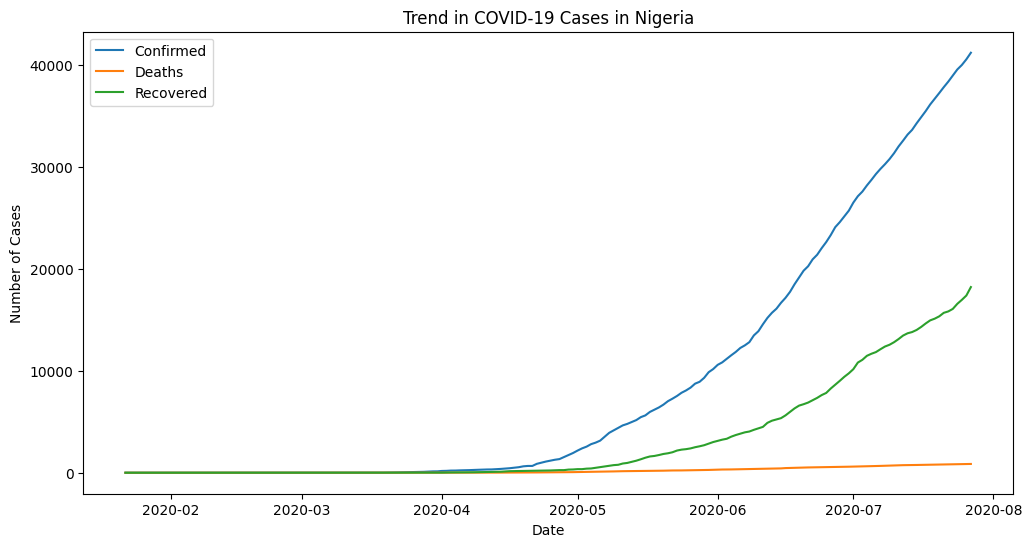

In [58]:
#visualizations
plt.figure(figsize = (12, 6))
plt.plot(Nigeria['Date'], Nigeria['Confirmed'], label = 'Confirmed')
plt.plot(Nigeria['Date'], Nigeria['Deaths'], label = 'Deaths')
plt.plot(Nigeria['Date'], Nigeria['Recovered'], label = 'Recovered')
plt.title('Trend in COVID-19 Cases in Nigeria')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(False)
plt.legend()
plt.show()

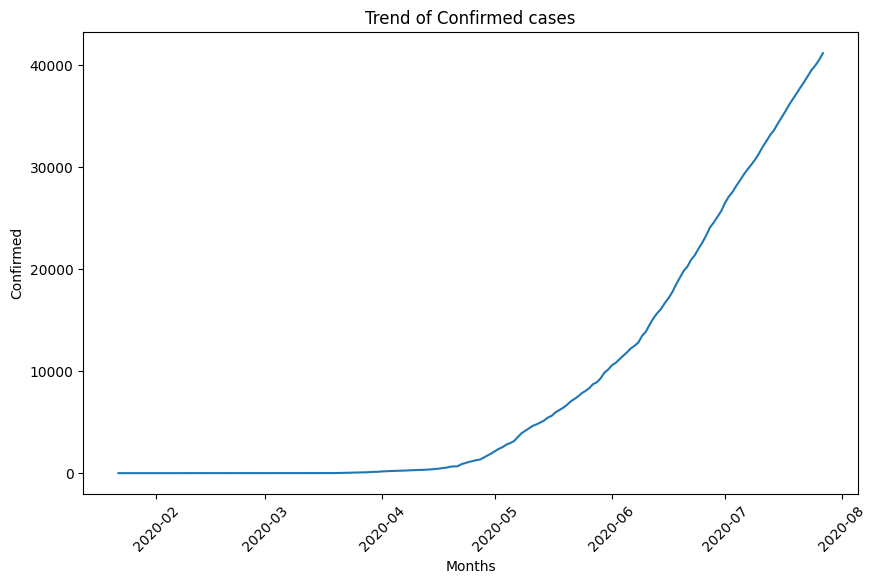

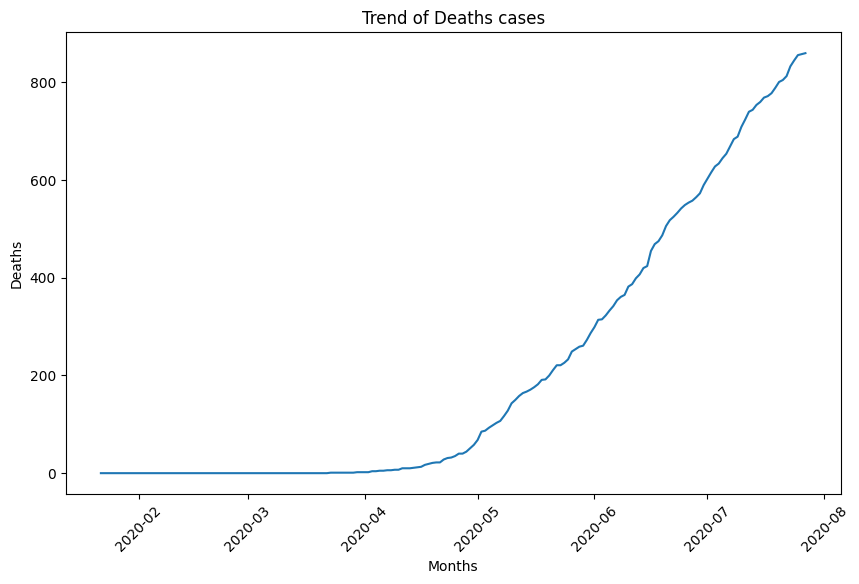

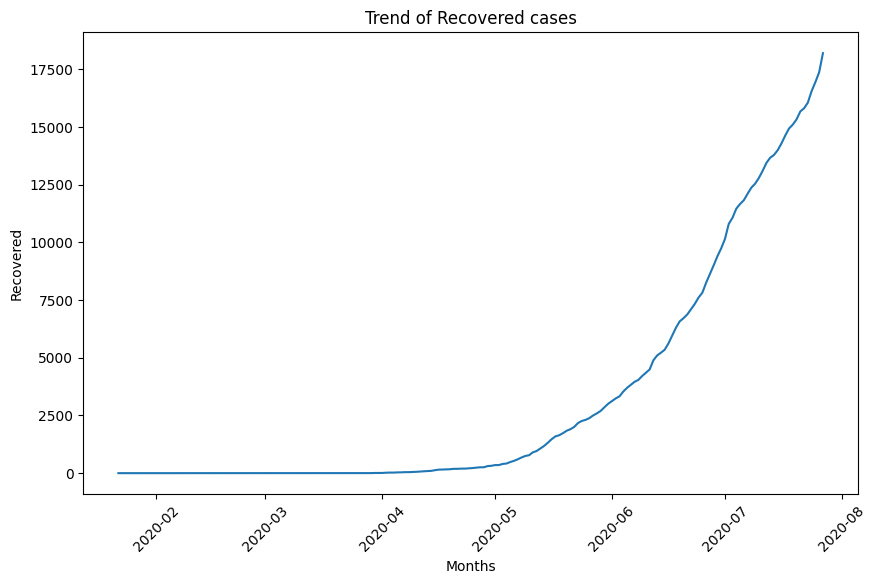

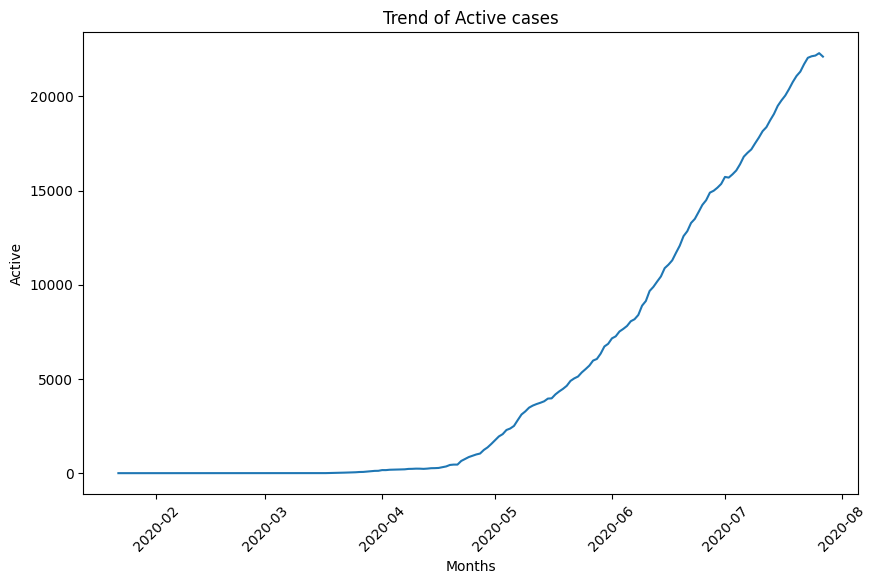

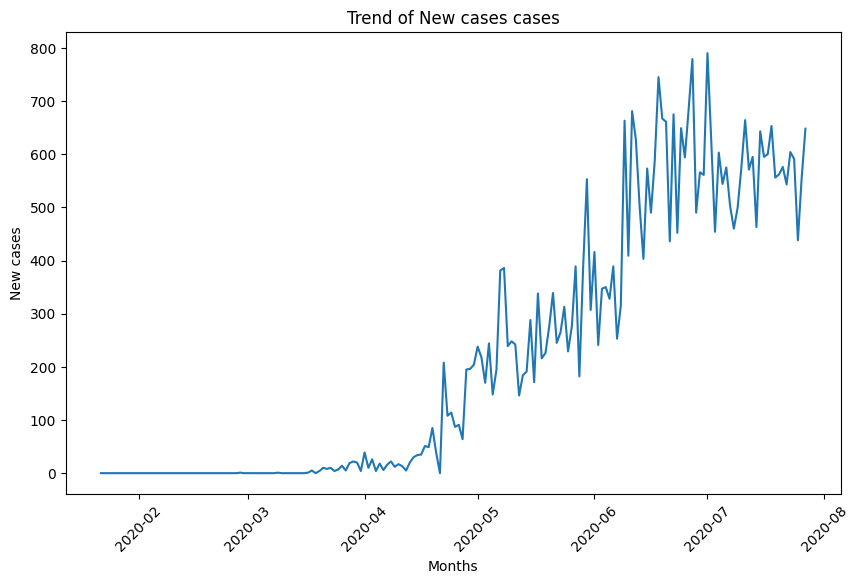

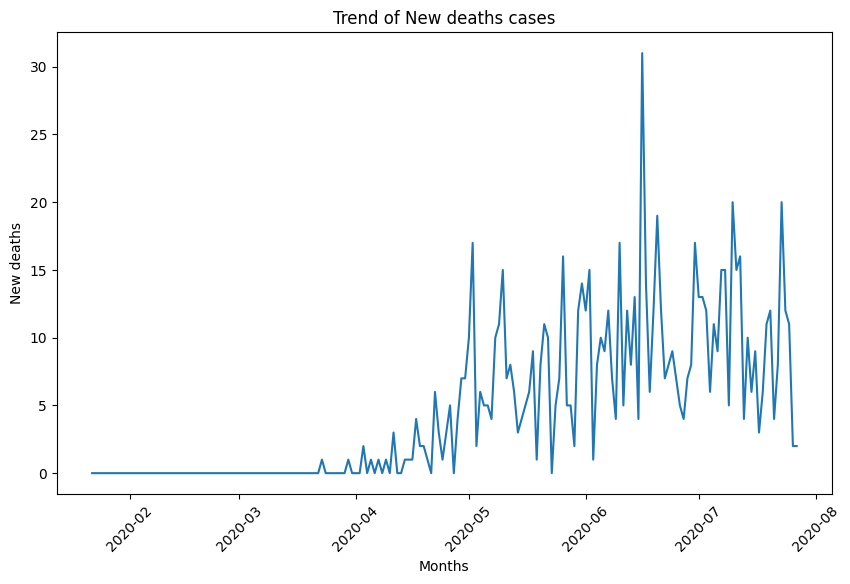

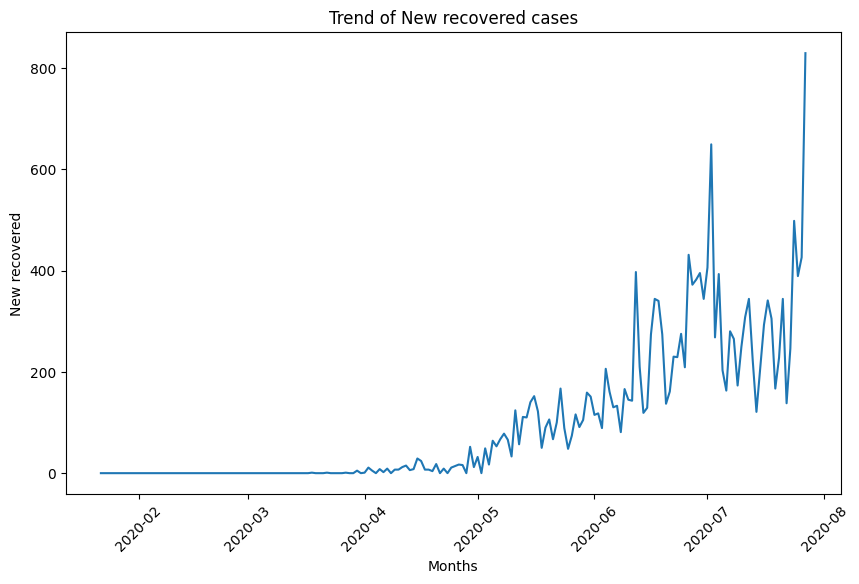

In [59]:
factors = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']
Nigeria = Nigeria.set_index('Date')

for factor in factors:
  plt.figure(figsize = (10, 6))
  plt.plot(Nigeria.index, Nigeria[factor])
  plt.title(f'Trend of {factor} cases')
  plt.xlabel('Months')
  plt.ylabel(factor)
  plt.xticks(rotation = 45)
  plt.grid(False)
  plt.show()

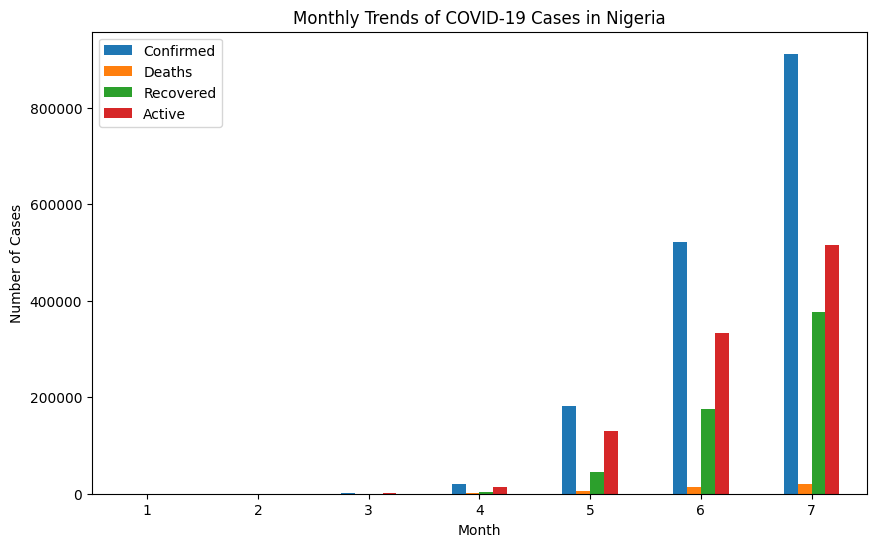

In [60]:
# Group data by month and sum the relevant columns
monthly_data = Nigeria.groupby('Month')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

# Create a bar plot to visualize trends
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Trends of COVID-19 Cases in Nigeria')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.savefig('Monthly Trends of COVID-19 Cases in Nigeria.png')
plt.show()

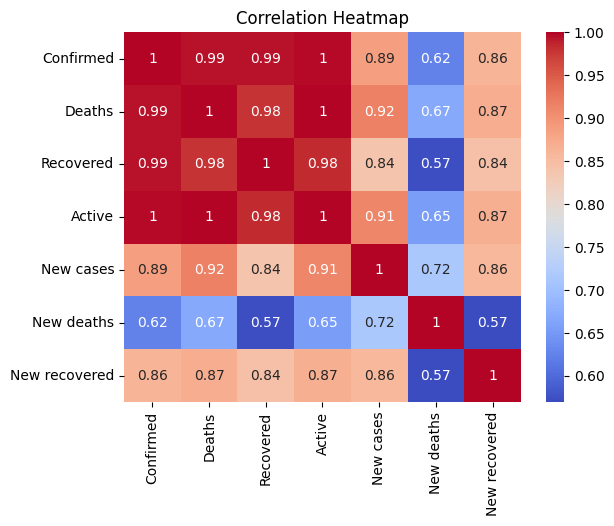

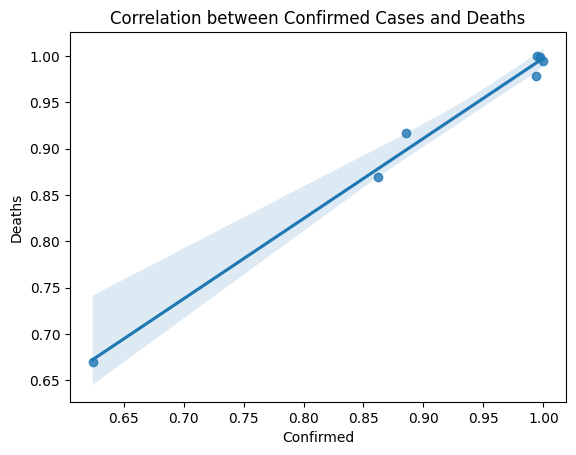

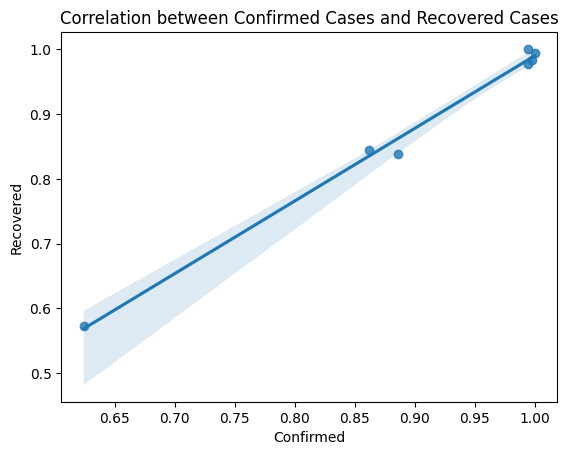

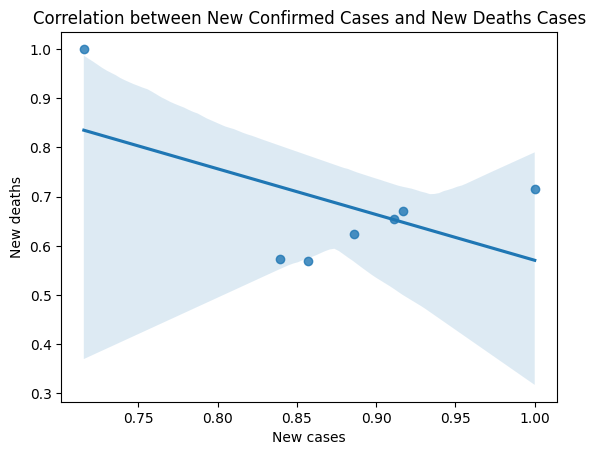

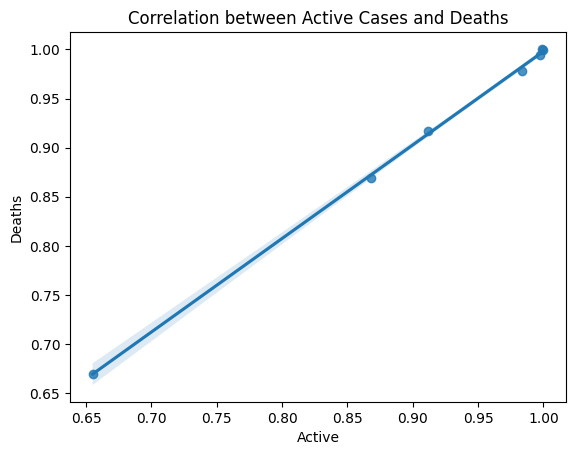

In [ ]:
#Correlation analysis
corr_data = Nigeria.drop(columns = ['Date', 'Month'])

sns.heatmap(corr_data.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap.png')
plt.show()

sns.regplot(data=corr_data.corr(), x='Confirmed', y='Deaths')
plt.title('Correlation between Confirmed Cases and Deaths')
plt.savefig('Correlation between Confirmed Cases and Deaths.png')
plt.show()

sns.regplot(data=corr_data.corr(), x='Confirmed', y='Recovered')
plt.title('Correlation between Confirmed Cases and Recovered Cases')
plt.savefig('Correlation between Confirmed Cases and Recovered Cases.png')
plt.show()

sns.regplot(data=corr_data.corr(), x='New cases', y='New deaths')
plt.title('Correlation between New Confirmed Cases and New Deaths Cases')
plt.savefig('Correlation between New Confirmed Cases and New Deaths Cases.png')
plt.show()

sns.regplot(data=corr_data.corr(), x='Active', y='Deaths')
plt.savefig('Correlation between Active Cases and Deaths.png')
plt.title('Correlation between Active Cases and Deaths')
plt.show()

In [ ]:
#Feature Engineering
Nigeria['Growth_rate'] = Nigeria['Confirmed'].pct_change() * 100
Nigeria['Mortality_rate'] = (Nigeria['Deaths']/ Nigeria['Confirmed']) * 100
Nigeria['Recovery_rate'] = (Nigeria['Recovered']/ Nigeria['Confirmed']) * 100
Nigeria['Active_case_ratio'] = (Nigeria['Active']/ Nigeria['Confirmed']) * 100

Nig_population = 206606300
Nig_total_test = 306894
Nigeria['New_case_per_100k'] = (Nigeria['New cases']/ Nig_population) * 100000
Nigeria['Test_per_confirmed_cases'] = Nig_total_test/ (Nigeria['Confirmed'])
Nigeria.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Month,Growth_rate,Mortality_rate,Recovery_rate,Active_case_ratio,New_case_per_100k,Test_per_confirmed_cases
Month_Name,,,,,,,,,,,,,,,
January,2020-01-22,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,0.0,inf
January,2020-01-23,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,0.0,inf
January,2020-01-24,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,0.0,inf
January,2020-01-25,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,0.0,inf
January,2020-01-26,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,0.0,inf


In [ ]:
Nigeria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, January to July
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      188 non-null    datetime64[ns]
 1   Confirmed                 188 non-null    int64         
 2   Deaths                    188 non-null    int64         
 3   Recovered                 188 non-null    int64         
 4   Active                    188 non-null    int64         
 5   New cases                 188 non-null    int64         
 6   New deaths                188 non-null    int64         
 7   New recovered             188 non-null    int64         
 8   Month                     188 non-null    int32         
 9   Growth_rate               151 non-null    float64       
 10  Mortality_rate            151 non-null    float64       
 11  Recovery_rate             151 non-null    float64       
 12  Active_case_ratio   

In [ ]:
Nig_data = Nigeria.fillna(0)
Nig_data.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Month,Growth_rate,Mortality_rate,Recovery_rate,Active_case_ratio,New_case_per_100k,Test_per_confirmed_cases
Month_Name,,,,,,,,,,,,,,,
January,2020-01-22,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,inf
January,2020-01-23,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,inf
January,2020-01-24,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,inf
January,2020-01-25,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,inf
January,2020-01-26,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,inf


In [ ]:
Nig_data['Test_per_confirmed_cases'] = Nig_data['Test_per_confirmed_cases'].replace([np.inf, -np.inf], 0)

Nig_data.head(3)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Month,Growth_rate,Mortality_rate,Recovery_rate,Active_case_ratio,New_case_per_100k,Test_per_confirmed_cases
Month_Name,,,,,,,,,,,,,,,
January,2020-01-22,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
January,2020-01-23,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
January,2020-01-24,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Nig_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, January to July
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      188 non-null    datetime64[ns]
 1   Confirmed                 188 non-null    int64         
 2   Deaths                    188 non-null    int64         
 3   Recovered                 188 non-null    int64         
 4   Active                    188 non-null    int64         
 5   New cases                 188 non-null    int64         
 6   New deaths                188 non-null    int64         
 7   New recovered             188 non-null    int64         
 8   Month                     188 non-null    int32         
 9   Growth_rate               188 non-null    float64       
 10  Mortality_rate            188 non-null    float64       
 11  Recovery_rate             188 non-null    float64       
 12  Active_case_ratio   

In [ ]:
# Select columns with float64 dtype
float64_cols = Nig_data.select_dtypes(include=['float64']).columns

# Replace inf and -inf with NaN so they can be handled by fillna
Nig_data[float64_cols] = Nig_data[float64_cols].replace([np.inf, -np.inf], np.nan)

# Fill NaN values with 0 before converting to int64
Nig_data[float64_cols] = Nig_data[float64_cols].fillna(0).astype('int64')

# Verify the changes
Nig_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, January to July
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      188 non-null    datetime64[ns]
 1   Confirmed                 188 non-null    int64         
 2   Deaths                    188 non-null    int64         
 3   Recovered                 188 non-null    int64         
 4   Active                    188 non-null    int64         
 5   New cases                 188 non-null    int64         
 6   New deaths                188 non-null    int64         
 7   New recovered             188 non-null    int64         
 8   Month                     188 non-null    int32         
 9   Growth_rate               188 non-null    int64         
 10  Mortality_rate            188 non-null    int64         
 11  Recovery_rate             188 non-null    int64         
 12  Active_case_ratio   

In [ ]:
Nig_data.head(2)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Month,Growth_rate,Mortality_rate,Recovery_rate,Active_case_ratio,New_case_per_100k,Test_per_confirmed_cases
Month_Name,,,,,,,,,,,,,,,
January,2020-01-22,0,0,0,0,0,0,0,1,0,0,0,0,0,0
January,2020-01-23,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Predictive modeling
x = Nig_data.drop(columns = ['Date', 'Confirmed'], axis = 1)
y = Nig_data['Confirmed']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)

predictions = lm.predict(x_test)

In [ ]:
#Model evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.1948340592895255e-22
R-squared: 1.0
